<a href="https://colab.research.google.com/github/amfsunlimited/Machine-Learning-Beginner-/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Load the dataset into pandas dataframe

In [ ]:
df = pd.read_csv("train.csv")
df


,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


Plot a graph using matplotlib to visualize the distribution of the data points

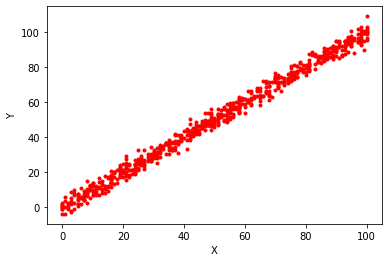

In [ ]:
%matplotlib inline
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(df.x,df.y,color = "red", marker = ".")

The Linear Regression Model to train the data. The fit() function is used to train the dataset.


The dataset was not clean. So I had to clean the dataset using a fn that I copied from https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(df)
reg= linear_model.LinearRegression()
reg.fit(df[['x']],df.y)

LinearRegression()

Now its time for some prediction. The model is trained. The fit function basically trained the model on the dataset and found the optimal value for 'm' and 'c' for the equation y = mx + c. 

In [ ]:
reg.predict([[50.0]])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([49.92555363])

Find out the value of coefficient and intercept

In [ ]:
print(reg.coef_)
print(reg.intercept_)

[1.00065638]
-0.10726546430097272


Use the test dataset to test the model.

In [ ]:
d_test = pd.read_csv("test.csv")
d_test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [ ]:
prediction = reg.predict(d_test[['x']])

Create a new column in your dataframe and store the predicted data

In [ ]:
d_test['predicted_y'] = prediction

In [ ]:
d_test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


Export the dataframe to a csv file

In [ ]:
d_test.to_csv("Prediction.csv", index = False)

Plotting the data points along with the predicted line

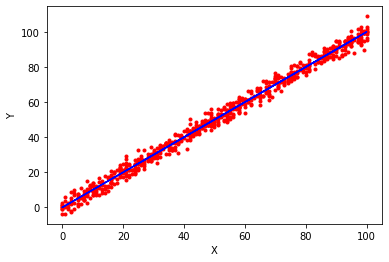

In [ ]:
%matplotlib inline
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(df.x,df.y,color = "red", marker = ".")
plt.plot(df.x,reg.predict(df[['x']]),color = "blue")

Define the model score: 
Return the coefficient of determination of the prediction.

The coefficient of determination  is defined as R**2 = (1-u/v)
 
, where u is the residual sum of squares ((y_true - y_pred)** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R**2
 score of 0.0

In [ ]:
reg.score(d_test[['x']], d_test.y)

0.9888014444327563

In [ ]:
from sklearn.metrics import r2_score

d_test.x

0      77
1      21
2      22
3      20
4      36
       ..
295    71
296    46
297    55
298    62
299    47
Name: x, Length: 300, dtype: int64

In [ ]:
d_test.y.mean()
len(d_test.y)

300

In [ ]:
y_test_mean = np.full(len(d_test.y),d_test.y.mean())
y_test_mean

array([51.2050511, 51.2050511, 51.2050511, 51.2050511, 51.2050511,
       51.2050511, 51.2050511, 51.2050511, 51.2050511, 51.2050511,
       51.2050511, 51.2050511, 51.2050511, 51.2050511, 51.2050511,
       51.2050511, 51.2050511, 51.2050511, 51.2050511, 51.2050511,
       51.2050511, 51.2050511, 51.2050511, 51.2050511, 51.2050511,
       51.2050511, 51.2050511, 51.2050511, 51.2050511, 51.2050511,
       51.2050511, 51.2050511, 51.2050511, 51.2050511, 51.2050511,
       51.2050511, 51.2050511, 51.2050511, 51.2050511, 51.2050511,
       51.2050511, 51.2050511, 51.2050511, 51.2050511, 51.2050511,
       51.2050511, 51.2050511, 51.2050511, 51.2050511, 51.2050511,
       51.2050511, 51.2050511, 51.2050511, 51.2050511, 51.2050511,
       51.2050511, 51.2050511, 51.2050511, 51.2050511, 51.2050511,
       51.2050511, 51.2050511, 51.2050511, 51.2050511, 51.2050511,
       51.2050511, 51.2050511, 51.2050511, 51.2050511, 51.2050511,
       51.2050511, 51.2050511, 51.2050511, 51.2050511, 51.2050

In [ ]:
r2_score(d_test[['x']], d_test.y)

0.9883886222259362